## Numerical Recipes Workshop 4

Week 18 Oct - 22 Oct 2021
**Please submit your notebook via Noteable by the Friday 6pm. 
 
**IMPORTANT!** Before submitting your notebook, clear the output by clicking *Restart & Clear Output* from the *Kernel* menu. If you do not do this, the file size of your notebook will be very large.

### Learning Objectives

* Univariate and multivariate optimization methods
* Importance of starting point for optimization 
* Difference between gradient and gradient-free methods

Please complete the workshop notebook before beginning on the checkpoint. **The workshop notebooks demonstrate everything you need to complete the checkpoints.**

The documentation relevant for the this workshop is here https://docs.scipy.org/doc/scipy/reference/optimize.html

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as scopt
import numpy as np
import time
plt.rcParams['figure.figsize']=[15,10]

# Golden section algorithm 

One of the simplest 1D optimization algorithms is the Golden section method discussed in the 
lecture.
Here you need to implement it.


In [41]:
def golden_section(func, a, b, tolerance=1e-5): 
    """
    Arguments:
    
    func - Function that takes scalar values and returns a scalar 
    a - left edge of the interval where the minimum is
    b - right edge of the interval where the minimum is
    tolerance for the stopping
    
    Return the location of the minimum
    """
# YOUR CODE HERE
    while True:
        c = 0.62*a + 0.38*b
        d = 0.62*b + 0.38*a
        if func(c)<func(d):
            a = a
            b = d
        else:
            a = c
            b = b
        if (b-a) < tolerance:
            return b

In [42]:
# if your function runs for long time it means it is likely in the infinite loop
# and you will need to interrupt it

def test_func(x):
    return (x - 13) **2

# Here we verify that the algorithm works 
assert (np.abs(golden_section(test_func, -15, 22, 1e-5) - 13)) < 1e-5


# scipy 1D optimization 

The 1D optimization in scipy is implemented with `scipy.optimize.minimize_scalar`

Use the Brent and Golden section minimization to find the minimum of the function
$x^2 + (\cos(x-\frac{1}{5}\pi))^2$. You can assume that the minimum is located within (-10,10)

plot the function and verify that the minimum location and minimum function value is correct.

In [43]:
from scipy.optimize import minimize,minimize_scalar

In [44]:
# YOUR CODE HERE
def func(x):
    return x**2 + (np.cos(x - 0.2*np.pi))**2

In [45]:
res = minimize_scalar(func, bracket=(-10,10))
res.x

-0.4282509486933673

# Convergence speed

An important characteriztic of the optimization algorithm is the time needed (or number of function evaluation) to get within $\epsilon$ of the true minimum. 
Use the `scipy.optimize.minimize_scalar` to optimize the same function as before 
$x^2 + (\cos(x-\frac{1}{5}\pi))^2$ to see the dependence of the number of function evaluations 
vs tolerance for both Brent and Golden section algoritms. 
Change tolerance on a logarithmic grid from 1e-15 to 0.1 and plot the number of function evaluations
vs tolerance. *It is okay to use loops for this exercise*
Make sure to label the axes and different curves!
Which algorithm would you use ? 
To extract the number of function evaluations, read the documentation on the object returned by minimize_scalar.

In [46]:
# YOUR CODE HERE
tols = np.logspace(-15,-1,15)
B_evals = []
G_evals = []
for tol in tols:
    brent = minimize_scalar(func, bracket=(-10,10),tol=tol,method = 'Brent')
    golden = minimize_scalar(func, bracket=(-10,10),tol=tol,method = 'Golden')
    B_evals.append(brent.nfev)
    G_evals.append(golden.nfev)

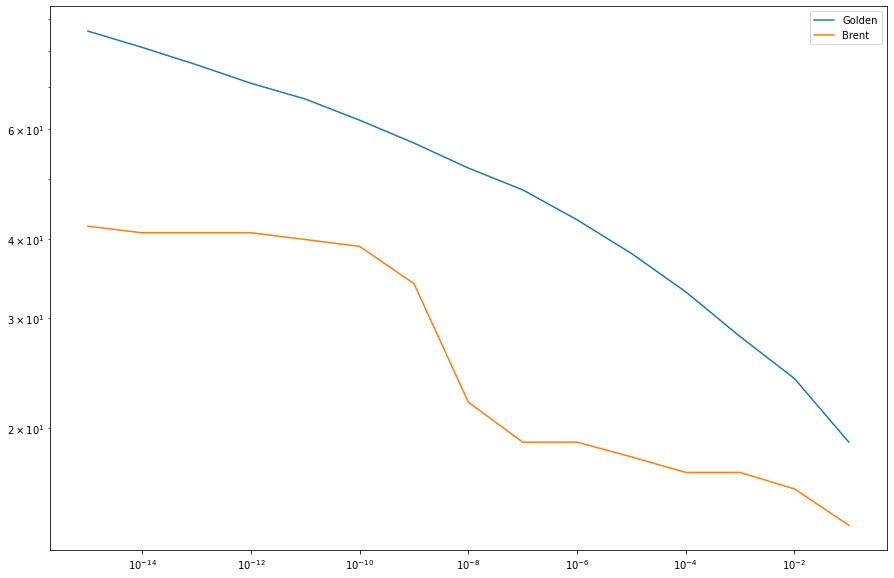

In [47]:
plt.loglog(tols,G_evals,label='Golden')
plt.loglog(tols,B_evals,label='Brent')
plt.legend();

# Multivariate optimization


The key algorithms to remember for multi-variate interpolation are the gradient-free Nelder-Mead algorithm, 
and the gradient-based family of algorithms that includes BFGS (Broyden-Fletcher-Goldfarb-Shannon).

All these and other algorithms can be accessed using `scipy.optimize.minimize` function and it method parameter.


## Nelder Mead algorithm 

It can be used by selecting the method='Nelder-Mead' of scipy.optimize.minimize

### Challenge 

Optimize the function using Nelder-Mead algorithm
$\sqrt{(x^2+y^2-9)^2 +0.1  x^2 + .2 y + 1} $
Use the starting point of (-2,-2)
Visualize the fuction on a grid from -4<x<4 -4<y<4 (use np.mgrid and plt.imshow )

Overplot the minimum that you have found.
Does it sit in the right place ? 
(you may need to use origin='lower' option to imshow and it's vmax=, vmin= options)

In [48]:
# YOUR CODE HERE
def func2(v):
    x = v[0]
    y = v[1]
    return np.sqrt((x**2 + y**2 - 9)**2 + 0.1*x**2 + 0.2*y + 1)

In [49]:
results = minimize(func2,x0=np.array([-2,-2]),method='Nelder-Mead')

In [50]:
results.x

array([ 4.98136965e-05, -3.00277037e+00])

In [51]:
#turn X,Y into single list

In [52]:
Xgrid, Ygrid = np.mgrid[-4:4:0.01,-4:4:0.01]

In [53]:
X_flat = Xgrid.flatten()

In [54]:
Y_flat = Ygrid.flatten()

In [55]:
new = np.array([X_flat,Y_flat])

In [56]:
z = func2(new)

In [57]:
z = z.reshape(Xgrid.shape)

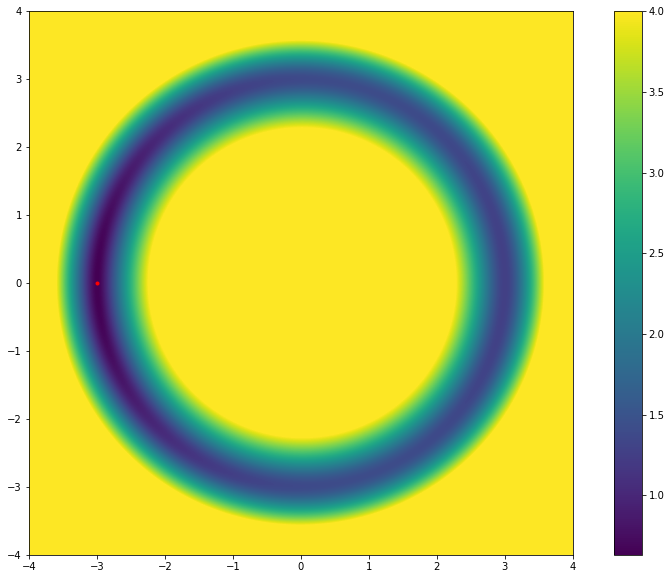

In [58]:
plt.imshow(z, extent=(-4,4,-4,4),origin='lower',vmax=4)
plt.colorbar()
plt.plot(results.x[1],results.x[0],'r.')

# Influence of starting point 

### Challenge
Run the optimization of the same function using the same algorithm but starting from [2,2]

Did you find the same solution ? Is the value of the function lower or higher ?  

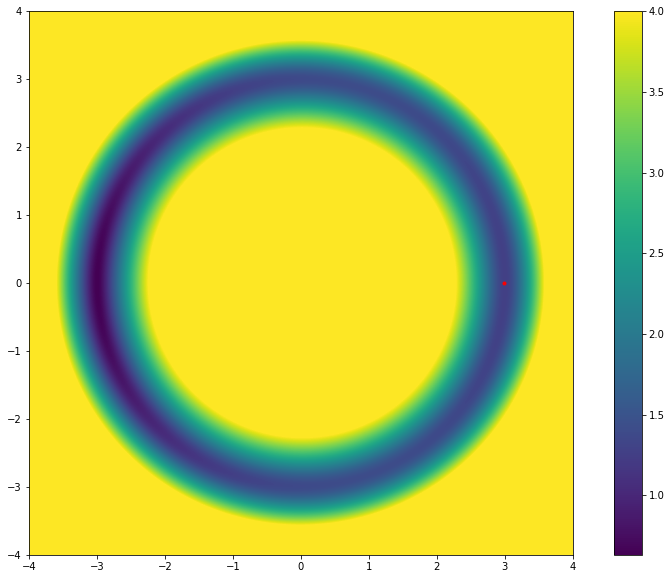

In [59]:
# YOUR CODE HERE
results2 = minimize(func2,x0=np.array([2,2]),method='Nelder-Mead')
results2.x
plt.imshow(z, extent=(-4,4,-4,4),origin='lower',vmax=4)
plt.colorbar()
plt.plot(results2.x[1],results2.x[0],'r.')

# Illustration of the Nelder-Mead algorithm

Run to optimization of the Rosenbrock function $100 (x^2-y)^2 + (x-1)^2$ using Nelder-Mead algorithm (starting from point [-3,-3]). Record where the x,y locations of where function is evaluated and then plot the location of function evaluations on the contour levels of the function (in the region -4<x<4 -4<y<4; use plt.contour) 

You can record the function calls by defining your function like this this 
```
calls_history=[]
def myfunc(p):
    calls_history.append(p)
    return SOME_EXPRESSION
```

You should be able to see on the plot the 'triangles' of the Nelder-Mead algorithm.

In [60]:
def func3(v):
    x,y=v
    return 100*(x**2-y)**2 + (x-1)**2

In [61]:
#contour plot of function

In [62]:
z = func3(new)

In [74]:
calls_history = []

In [81]:
calls_history = []
def rosenbrock(v):
    x,y = v
    calls_history.append(v)
    z = 100*(x**2-y)**2 + (x-1)**2
    return z

In [82]:
rosenbrock(new)

array([40025.      , 39985.01    , 39945.04    , ..., 14289.429101,
       14265.538901, 14241.668701])

In [83]:
l = np.array(calls_history)
a,b = zip(*l)

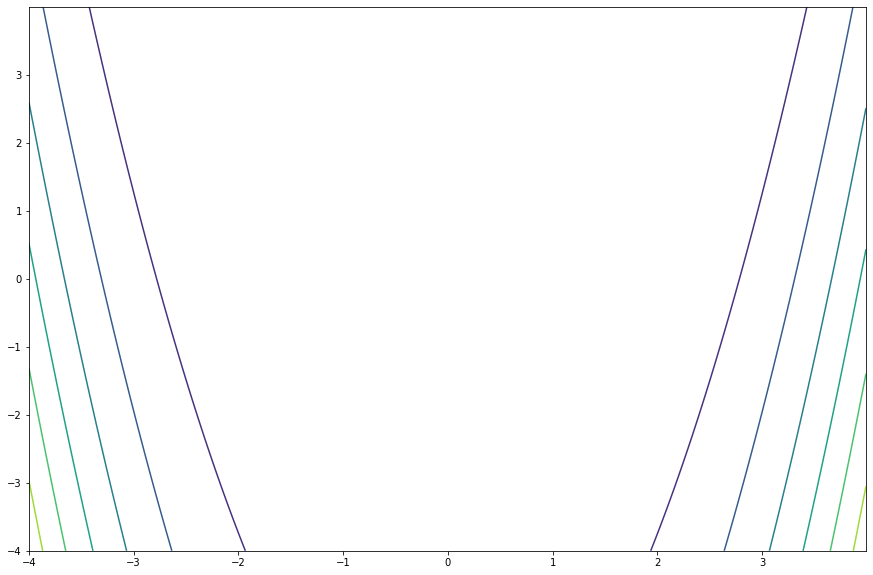

In [84]:
res3 = minimize(rosenbrock,x0=np.array([-3,-3]),method='Nelder-Mead')
plt.figure()
plt.contour(Xgrid, Ygrid, z.reshape(Xgrid.shape))
#plt.plot(a,b,'.')
plt.show()
#overlayed with scatter plot of calls_history

In [ ]:
res3.nfev

# Gradient based methods

Use the BFGS algorithm to optimize the same Rosenbrock function 
$100(x^2-y)^2+(x-1)^2$ utilizing the function with the gradient (that I have analytically computed).
Compare the number of function evaluations to the previous Nelder-Mead run.

In [85]:
def func4(x,y):
    return 100*(x**2-y)**2 + (x-1)**2

In [86]:
def rosenbrock_gradient(x):
    return np.array([400*(x[0]**2-x[1])*x[0]+2*(x[0]-1), 200*(x[1]-x[0]**2)])

res_BFGS = minimize(rosenbrock, x0=np.array([-3,-3]), method='BFGS', jac=rosenbrock_gradient)

In [87]:
res_BFGS.nfev #80 evals compared to 150 for NM

80

### BFGS algorithm without an explicit gradient
scipy's BFGS algorithm can also compute the gradient of the function itself (using finite differentiation) if you don't provide it directly. 
Optimize the same function as before using BFGS without providing the gradient and compare the number of function evaluations to the previous run done before.

In [88]:
# YOUR CODE HERE
res_BFGS2 = minimize(rosenbrock, x0=np.array([-3,-3]), method='BFGS')
res_BFGS2.nfev #282 ~ 200more evals without gradient function

282

# Convergence  and tolerances

Most minimization algorithms have tolerances and limits for the number of iterations that will stop the algorithms.

Investigate the impact of the tolerance parameter of scipy.optimize.minimize() 
for a 30-dimensional optimization problem of function $f(x) = 10+ \sum_{i=0}^{i=29} (1 + i) (x-i)^4$ 
by plotting the distance between optimal vector found from minimization and the true minimum vector $||x_{true,min} - x_{min}||$ vs tolerance

Use the range of tolerances from [1e-10 to 1e-1] and tol= parameter of scipy.optimize.minimize
Make sure you understand the observed behaviour.

Function value at starting point 114151434.0
Function value at the true minimum 10
[2.94902683606324e-07, 2.94902683606324e-07, 2.94902683606324e-07, 2.94902683606324e-07, 2.94902683606324e-07, 2.94902683606324e-07, 9.283500297385672e-07, 2.185412960109545e-05, 0.00025224546858915176, 0.010958550314116522]


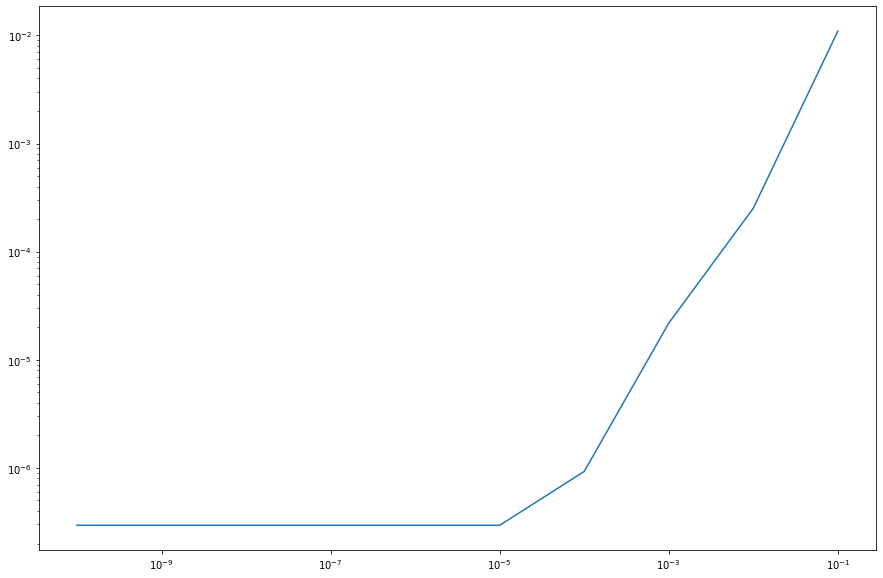

In [89]:
def func(x):
    # Function that takes 100 dimensional vector and returns a scalar
    vec = np.arange(30)
    return 10 + np.sum((1 + vec) * (x - vec)**4)

# The function has a minimum for this vector 
pmin = np.arange(30)

# This will be our starting point 
p0 = np.zeros(30)

print ('Function value at starting point', func(p0))
print ('Function value at the true minimum', func(pmin))

# YOUR CODE HERE
tols = np.logspace(-10,-1,10)
distance = []
for tol in tols:
    min_vec = scopt.minimize(func,x0=p0,tol=tol)
    distance.append(np.abs(func(pmin) - func(min_vec.x)))
print(distance)
plt.loglog(tols,distance)

# Multi-modal functions 

Many apllications lead to multi-modal functions.

Here we will look at the function $\sin(x) \cos(x)+ 0.006 (x-2)^2 + 0.01 (y-3)^2$ that has many local minima. 

If you just start one single run of optimize.minimize you are unlikely to find the global minimum of this function. 

## Challenge

Try to run the standard scipy.optimize.minimize optimizer many times (1000) starting from 
random points in the [-100,100],[-100,100] square. To do that you can use `x0=np.random.uniform(-100,100,size=2)`

Did you find the true minimum located at [1.57,3.14] with the function value of -.998 ? 

Visualize the function in the box -10<x<10 -10<y<10 (use plt.imshow) and verify that you have found the minimum

Optimize this function using `scipy.optimize.differential_evolution` optimizer that is able to explore multimodal distributions ( https://link.springer.com/article/10.1023/A:1008202821328 ) Did it manage to find the same global minimum ? If not, you can try to increase the maxiter parameter.

In [90]:
x0=np.random.uniform(-100,100,size=2)
x0

array([-44.68947307, -50.74919833])

In [91]:
# Multi-modal function 
def func( x):
    return np.sin(x[0]) * np.cos(x[1]) + .006 * (x[0]-2)**2 +0.01 * (x[1]-3)**2 

# YOUR CODE HERE
res =[]
i=0
while i <1000:
    x0=np.random.uniform(-100,100,size=2)
    minimized = scopt.minimize(func,x0)
    res.append(minimized.x)
    i += 1

(-10.0, 10.0, -10.0, 10.0)

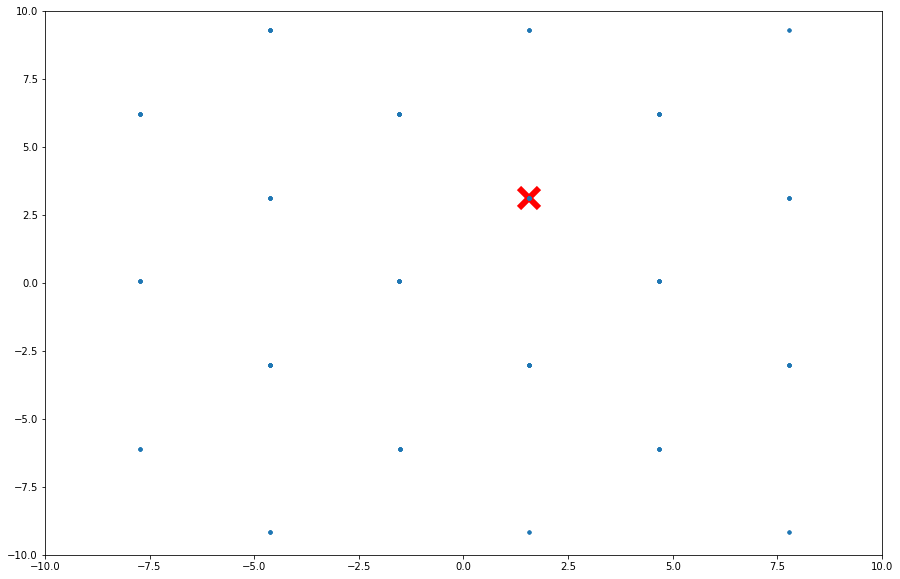

In [92]:
x,y=zip(*res)
plt.plot(1.57588084, 3.13881068,'rx',mew=6, ms=20)
plt.plot(x,y,'.')
plt.axis([-10,10,-10,10])

In [108]:
scopt.differential_evolution(func,bounds=(-8,8));

IndexError: tuple index out of range

# Comparison of Nelder-Mead and gradient methods

Different optimization methods require different number of iterations and function evaluations to reach the minimum. Different methods may also perform differently for high vs low dimesional problems.
Here we'll look at optimizing high dimensional RozenBrock function defined below.  https://en.wikipedia.org/wiki/Rosenbrock_function

Please optimize the function using 
* Nelder-Mead, 
* BFGS optimizer with user-provided gradient, 
* BFGS optimizer with gradient computed internally by scipy.optimize 
for dimensions ranging from 2 to 32. 
and plot the number of function calls vs the dimensionality of the problem for all different methods.
Make sure to label the axes and different curves.
(Note that the provided function will only work when the number of dimensions is even)

What do you conclude on which approach is better ? 

In [102]:
def func(x):
    ndim = len(x)
    return np.sum(100*(x[::2]**2-x[1::2])**2 + (x[::2]-1)**2)


def gradfunc(x):
    ndim = len(x)
    res =np.zeros(len(x))
    res[::2] = 400*(x[::2]**2-x[1::2])*res[::2]+2*(x[::2]-1)
    res[1::2] = 200*(x[1::2]-x[::2]**2)
    return res


NM = minimize(func,x0 = (-1,1), method='Nelder-Mead')
res_BFGS = minimize(func, x0=(-1,1)), method='BFGS', jac=gradfunc)
for i in range(1,32):
    res_BFGS2 = minimize(func, x0=(-1,1), method='BFGS')

print(NM.nfev)
print(res_BFGS.nfev)
print(res_BFGS2.nfev)

SyntaxError: cannot assign to function call (<ipython-input-102-52d6b74ebf12>, line 15)

# Symbolic derivatives/Autodifferentiation (Optional)

One package that allows to compute symbolic gradients of Python functions
is called jax  https://github.com/google/jax
Use that package to redefine the function from the previous exercise and then jax.grad function to 
compute the gradient of the function. (no analytical calculations are necessary)
Optimize the function in 100 dimensions using BFGS algorithm and the gradient function computed by jax and ensure that you get the minimum function value of 0.  

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()